# 02-stretch-hist.ipynb

In [1]:
import imageio.v3 as iio
import matplotlib.pyplot as plt
import napari
import numpy as np
from pathlib import Path
from skimage import exposure, filters, registration, util
# Local imports
import helpers

In [38]:
# Open napari window
viewer = napari.Viewer()

In [2]:
img_dir = Path(
        r'X:\Radiography Drive\2013-11_APS'
        r'\Clarke_2013_November\048_Sn27Bi_100')
img_start = 352
img_stop = 372
img_step = 1
imgs = helpers.get_imgs(
    img_dir,
    img_start=img_start,
    img_stop=img_stop,
    img_step=img_step,
    # n_imgs=20,
    print_nums=True
)

Loading 20 images...
Images loaded:
['0: 352', '1: 353', '2: 354', '3: 355', '4: 356', '5: 357', '6: 358', '7: 359', '8: 360', '9: 361', '10: 362', '11: 363', '12: 364', '13: 365', '14: 366', '15: 367', '16: 368', '17: 369', '18: 370', '19: 371']


In [39]:
viewer.add_image(imgs)

<Image layer 'imgs' at 0x166dc45cac0>

In [6]:
image = imgs[0, :, :]
offset_image = imgs[4, :, :]
shift, error, diffphase = registration.phase_cross_correlation(
        image, offset_image)
print(shift)

[-1.  0.]


## Resize images according to max offset

In [15]:
image = imgs[0, :, :]
offset_image = imgs[-1, :, :]
offset, error, diffphase = registration.phase_cross_correlation(
        image, offset_image)
max_offset_r = int(offset[0])
max_offset_c = int(offset[1])
print(max_offset_r, max_offset_c)

-5 0


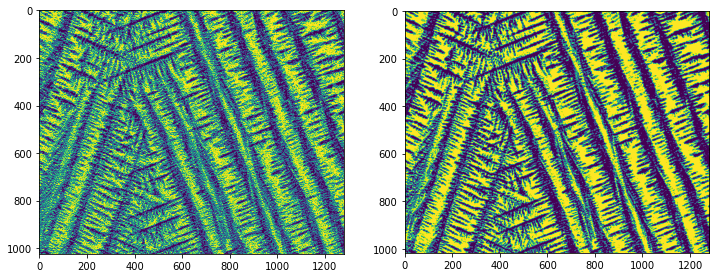

In [23]:
imgs_sub = np.zeros_like(imgs[-1, :, :])
imgs_sub = imgs[-1, :, :] - imgs[0, :, :]
imgs_sub_crctd = np.zeros(
        (imgs.shape[1] - abs(max_offset_r), imgs.shape[2] - abs(max_offset_c)))
imgs_sub_crctd = (
    imgs[
        -1,
        abs(max_offset_r) :,
        abs(max_offset_c) :,
    ] - imgs[
        0,
        : imgs.shape[1] - abs(max_offset_r),
        : imgs.shape[2] - abs(max_offset_c),
    ]
)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
ax = axes.ravel()
ax[0].imshow(imgs_sub)
ax[1].imshow(imgs_sub_crctd)
plt.show()

In [41]:
imgs_float = util.img_as_float(imgs)
imgs_sub = np.zeros_like(imgs[-1, :, :])
imgs_sub = imgs_float[:, :] - imgs_float[0, :, :]
imgs_sub_crctd = np.zeros(
        (imgs.shape[0],
         imgs.shape[1] - abs(max_offset_r),
         imgs.shape[2] - abs(max_offset_c)))
for i in range(imgs.shape[0]):
    offset, error, diffphase = registration.phase_cross_correlation(
            imgs_float[0, :, :], imgs_float[i, :, :])
    offset_r = int(offset[0])
    offset_c = int(offset[1])
    img_liq = imgs_float[
            0,
            : imgs.shape[1] - abs(max_offset_r),
            : imgs.shape[2] - abs(max_offset_c)]
    img_i = imgs_float[
            i,
            abs(offset_r) : imgs.shape[1] - (abs(max_offset_r) - abs(offset_r)),
            abs(offset_c) : imgs.shape[2] - (abs(max_offset_c) - abs(offset_c))]
    imgs_sub_crctd[i, :, :] = img_i - img_liq
viewer.add_image(imgs_sub)
viewer.add_image(imgs_sub_crctd)

<Image layer 'imgs_sub_crctd' at 0x166de5b8f40>